<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/%C3%81rboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Cargamos Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/wdbc.data', header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cols = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave_points_mean', 'simmetry_mean', 'fractal_dim_mean', 'radius_sd', 'texture_sd', 'perimeter_sd',
        'area_sd', 'smoothness_sd', 'compactness_sd', 'concavity_sd', 'concave_points_sd', 'simmetry_sd', 'fractal_dim_sd',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
        'concavity_worst', 'concave_points_worst', 'simmetry_worst', 'fractal_dim_worst']
df.columns = cols

#Árboles como Clasificadores

In [ ]:
#Fijamos el ID como el índice de la tabla
df.set_index('ID', inplace = True)
#Observamos la generalidad de las características para mirar la integridad de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             569 non-null    object 
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   perimeter_mean        569 non-null    float64
 4   area_mean             569 non-null    float64
 5   smoothness_mean       569 non-null    float64
 6   compactness_mean      569 non-null    float64
 7   concavity_mean        569 non-null    float64
 8   concave_points_mean   569 non-null    float64
 9   simmetry_mean         569 non-null    float64
 10  fractal_dim_mean      569 non-null    float64
 11  radius_sd             569 non-null    float64
 12  texture_sd            569 non-null    float64
 13  perimeter_sd          569 non-null    float64
 14  area_sd               569 non-null    float64
 15  smoothness_sd        

In [ ]:
#Revisamos el balanceo de las clases
df.Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,212


Hay un desbalanceo pero no es tan notorio y por ende para árboles es válido, si ya existiera un desbalanceo de por ejemplo 50 y 400, ahí sí me tocaria organizarlo.

In [ ]:
#Hacemos la partición de los datos
#Separamos la etiqueta de los datos
X = df.drop('Diagnosis', axis = 1)
y = df.Diagnosis

#Hacemos la partición entrenamiento/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify= y) #El stratify me ayuda a mantener las proporciones

In [ ]:
from sklearn.metrics import f1_score #dado el desbalanceo de las clases

#Instanciamos el modelo por defecto
model = DecisionTreeClassifier()

#Entrenamos el modelo
model.fit(X_train, y_train)

#Calculamos el f1_score para entrenamiento y para validación
train_score = f1_score(y_train, model.predict(X_train), average = 'weighted')
test_score = f1_score(y_test, model.predict(X_test), average = 'weighted')

#Visualizamos las métricas calculadas
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 1.0
Test score: 0.8957888725239713


In [ ]:
#Imprimos el reporte del entrenamiento
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       250
           M       1.00      1.00      1.00       148

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



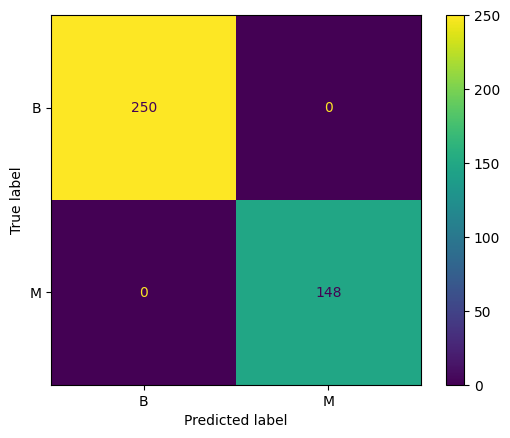

In [ ]:
#Visualizamos la matriz de confusión de entrenamiento
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

250 de las benignas fueron identificadas como benignas.

0 de las malignas fueron identificas como benignas.

140 de las malignas fueron clasificadas como malignas.

0 de las beningnas fueron calisificadas como malignas.

In [ ]:
#Realizamos el mismo procedimiento de visualización de métricas para el test
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           B       0.95      0.88      0.91       107
           M       0.82      0.92      0.87        64

    accuracy                           0.89       171
   macro avg       0.88      0.90      0.89       171
weighted avg       0.90      0.89      0.90       171



Notamos que:
1. Hay desbalanceo

2. Se está inclinando por el beningno (sesgado hacia el beningno)

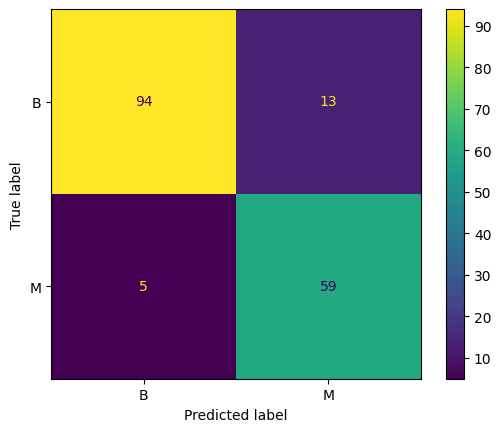

In [ ]:
#Visualizamos la matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
#Visualizamos la estructura del árbol
from sklearn.tree import export_text
#Estructura
print(export_text(model, feature_names =list(X.columns.values)))

|--- concave_points_mean <= 0.05
|   |--- area_worst <= 957.45
|   |   |--- area_sd <= 45.17
|   |   |   |--- compactness_worst <= 0.45
|   |   |   |   |--- perimeter_worst <= 112.65
|   |   |   |   |   |--- class: B
|   |   |   |   |--- perimeter_worst >  112.65
|   |   |   |   |   |--- smoothness_worst <= 0.14
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- smoothness_worst >  0.14
|   |   |   |   |   |   |--- class: M
|   |   |   |--- compactness_worst >  0.45
|   |   |   |   |--- class: M
|   |   |--- area_sd >  45.17
|   |   |   |--- compactness_mean <= 0.06
|   |   |   |   |--- class: M
|   |   |   |--- compactness_mean >  0.06
|   |   |   |   |--- class: B
|   |--- area_worst >  957.45
|   |   |--- smoothness_worst <= 0.10
|   |   |   |--- class: B
|   |   |--- smoothness_worst >  0.10
|   |   |   |--- class: M
|--- concave_points_mean >  0.05
|   |--- concave_points_worst <= 0.10
|   |   |--- class: B
|   |--- concave_points_worst >  0.10
|   |   |--- area_worst 

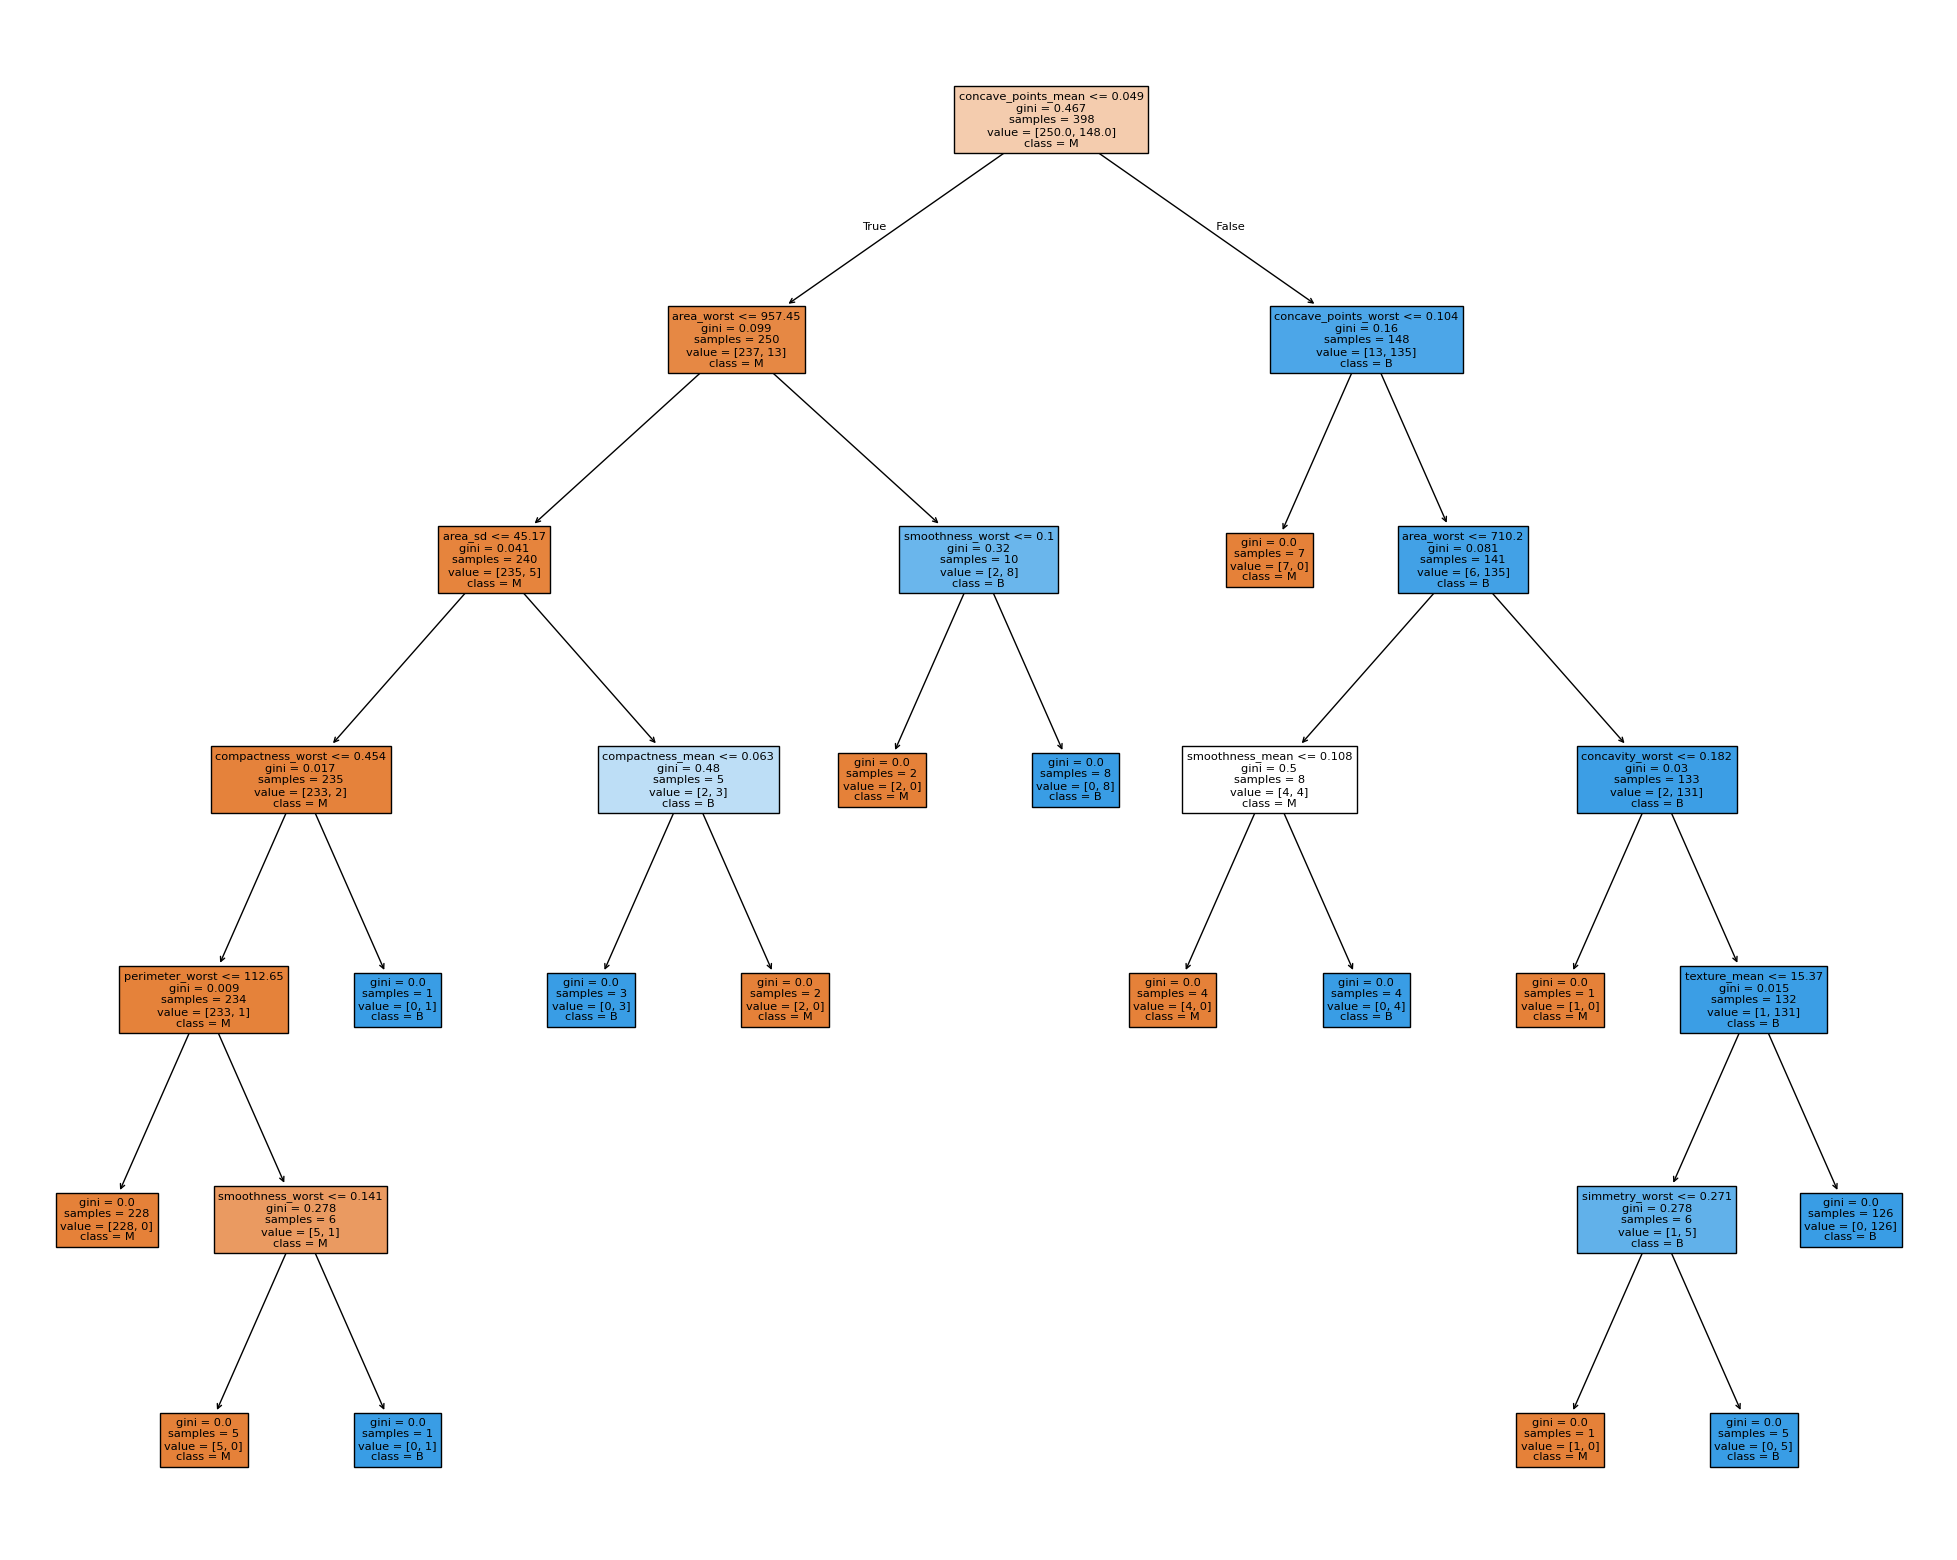

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

#Gráfico del Árbol
plt.figure(figsize = (25,20))
tree.plot_tree(model, feature_names = X.columns, class_names = y.unique(), filled = True);


##Prunning

Factor de complejidad ccp_alpha (post)

In [ ]:
#Cargamos las Libreraias para ajustar el Hiperparámetro
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.preprocessing import LabelEncoder

#Instanciamos el codificador de etiqueta
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

#Generamos los valores para la búsqueda del ccp_alpha
dist = {'ccp_alpha': loguniform(0.001,10)}

#Hacemos la sintonización del hiperparámetro
search = RandomizedSearchCV(DecisionTreeClassifier(), dist, scoring = 'f1_weighted')

#Entrenamos el modelo con el hiperparámetro sintonizado
search.fit(X_train, y_train_le)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d3bdd91a140>},
                   scoring='f1_weighted')

In [ ]:
#Calculamos las métricas en el test
test_score = f1_score(y_test_le, search.predict(X_test), average = 'weighted')

#Visualizamos las métricas calculadas
print(f'Test score: {test_score}')

Test score: 0.8674822195054939


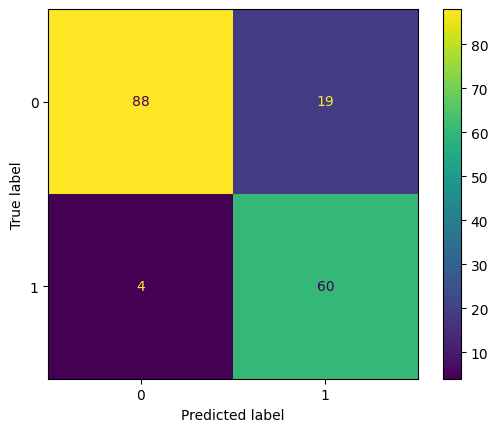

In [ ]:
#Observamos la matriz de confusión
ConfusionMatrixDisplay.from_estimator(search.best_estimator_, X_test, y_test_le);

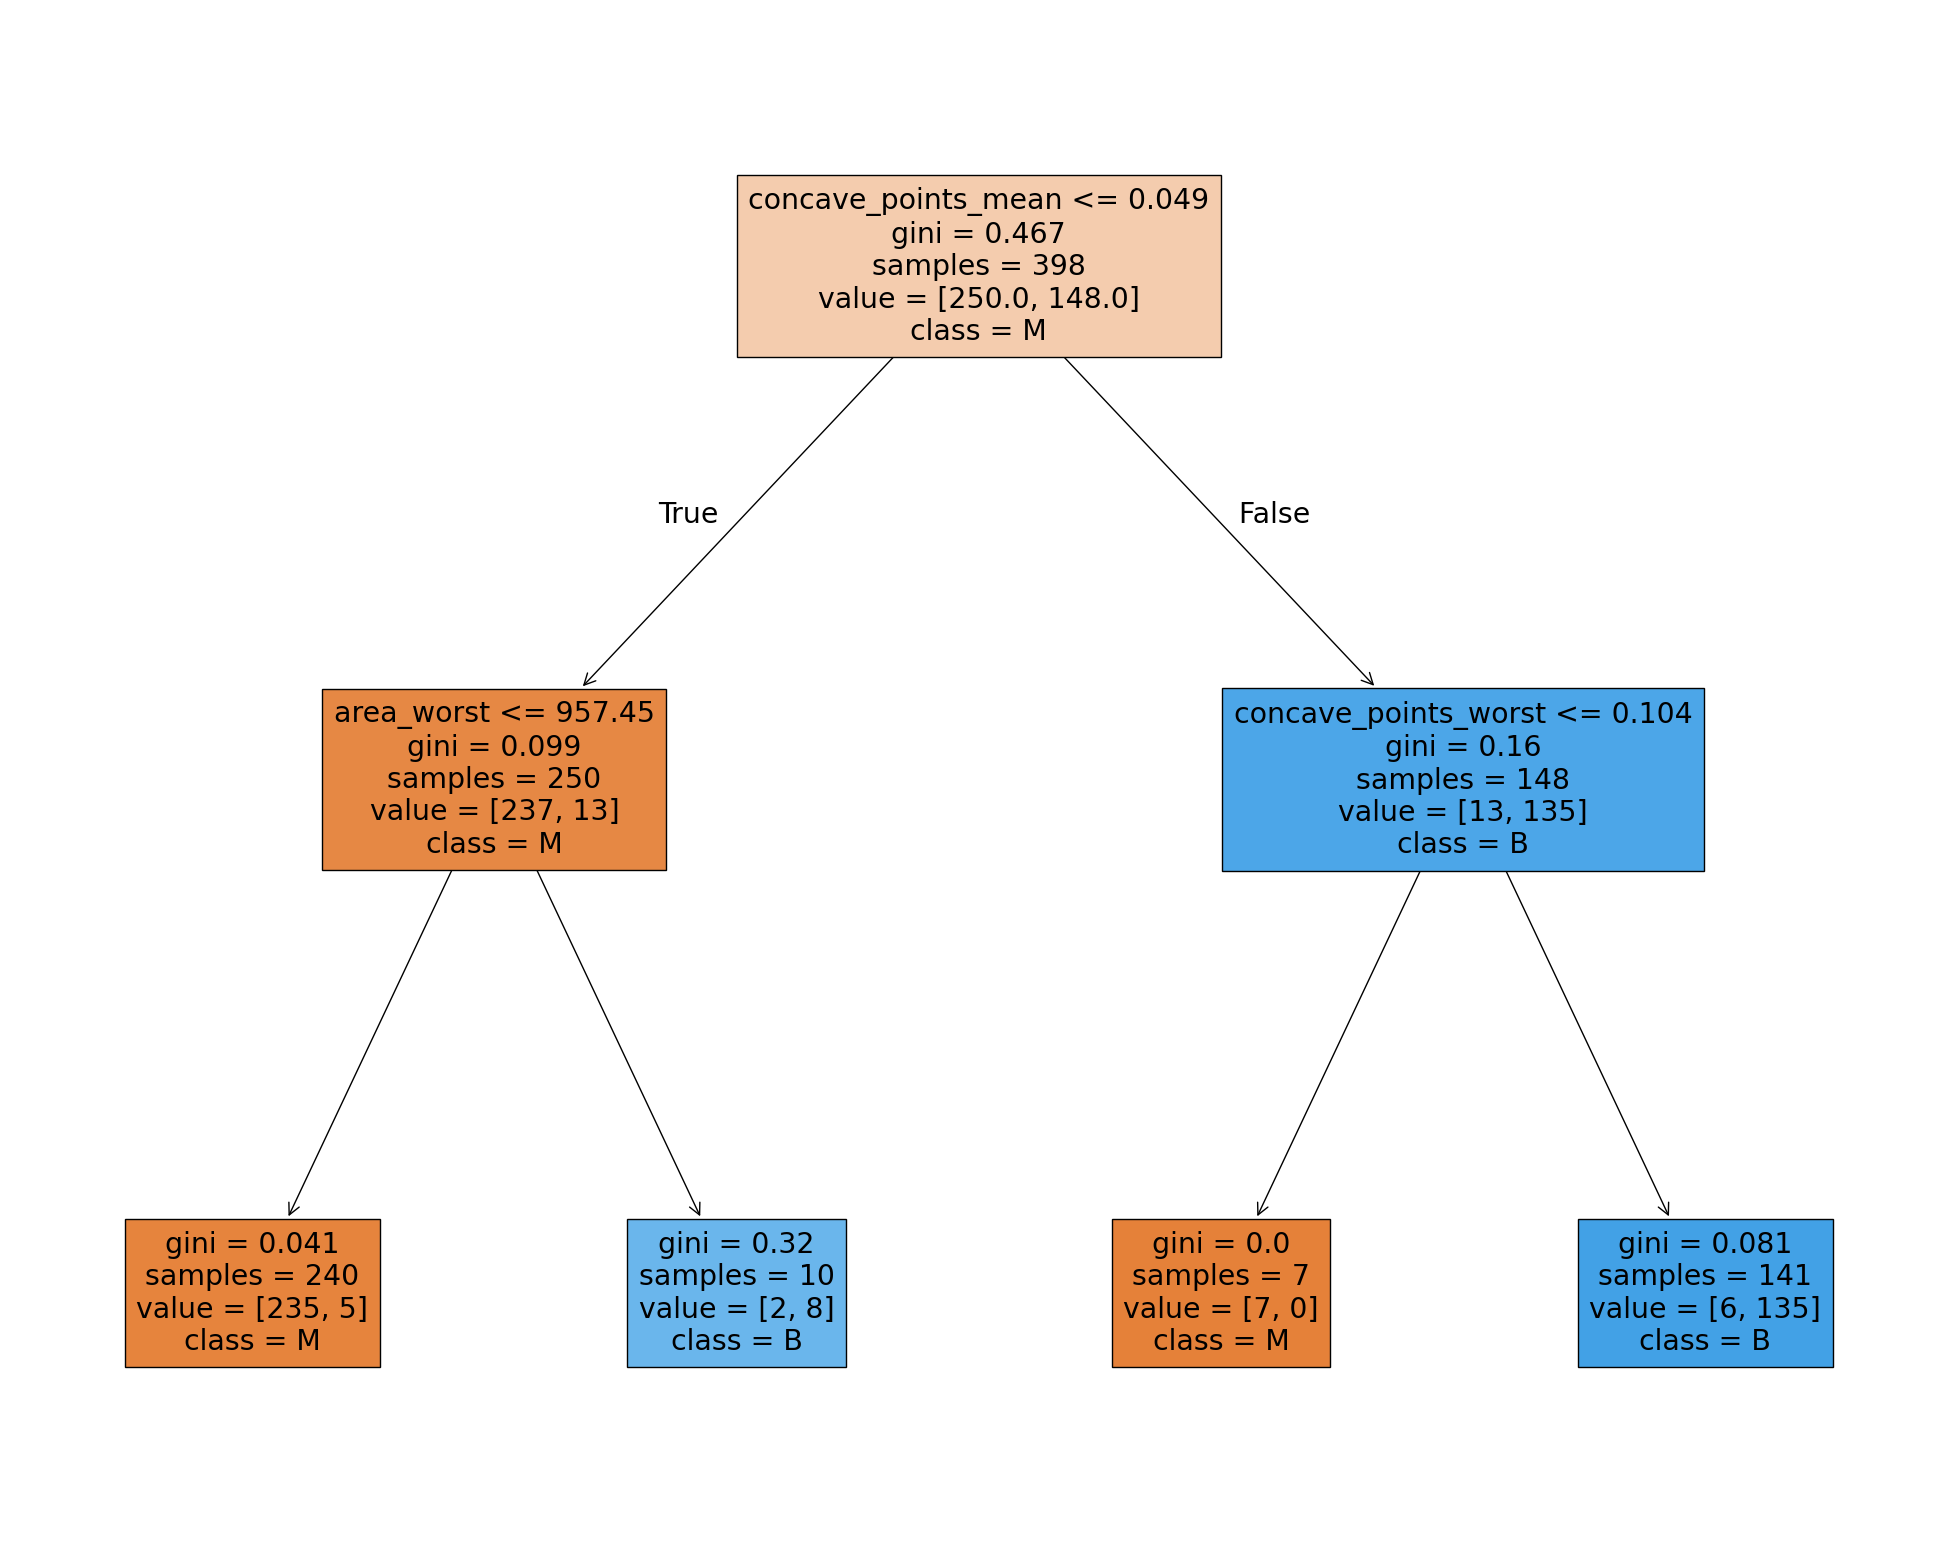

In [ ]:
#Miramos como queda la estructura del árbol
plt.figure(figsize = (25,20))
tree.plot_tree(search.best_estimator_, feature_names = X.columns, class_names = y.unique(), filled = True);

##Métodos pre

In [ ]:
#Modificamos el máximo nivel de profundidad
from sklearn.model_selection import GridSearchCV
import numpy as np

#Construimos la distribución de la máxima profundidad
grid = {'max_depth': np.arange(3,8)}

#Realizamos la búsqueda
grid_search = GridSearchCV(DecisionTreeClassifier(), grid, scoring = 'f1_weighted')

#Entrenamos el modelo
grid_search.fit(X_train, y_train_le)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7])},
             scoring='f1_weighted')

In [ ]:
#Revisamos el desempeño
print(f'Train score: {grid_search.score(X_train, y_train_le)}')
print(f'Test score: {grid_search.score(X_test, y_test_le)}')

Train score: 0.9949748743718593
Test score: 0.9016679732682843


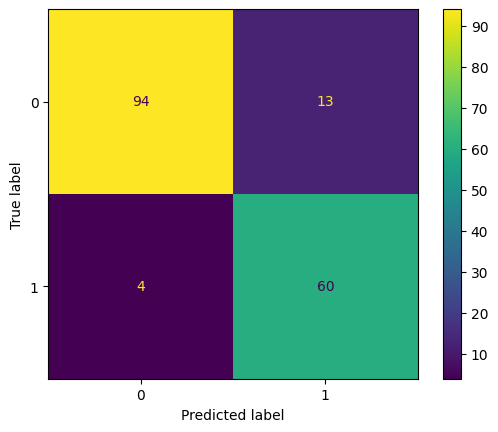

In [ ]:
#Matriz de confusión de test
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test_le);

##Importancia de las características

In [ ]:
df_importancia = pd.DataFrame({'feature': X.columns, 'importance': grid_search.best_estimator_.feature_importances_})

In [ ]:
#Ordenarlo de mayor a menor para poder tener el ranking
df_importancia.sort_values('importance', ascending = False)

,feature,importance
7,concave_points_mean,0.753386
23,area_worst,0.083276
27,concave_points_worst,0.066961
4,smoothness_mean,0.021906
10,radius_sd,0.019268
13,area_sd,0.018761
15,compactness_sd,0.013144
24,smoothness_worst,0.010813
26,concavity_worst,0.010707
22,perimeter_worst,0.001779


#Árboles como Regresores

In [ ]:
#Cargamos el archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

carros = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/auto-mpg.data', sep = '\s+', header = None,
                     na_values = ['?'], names = ['mpg', 'cylinders',
                                                 'displacement', 'horsepower',
                                                 'weight', 'acceleration', 'model_year',
                                                 'origin', 'car_name'])

In [ ]:
carros.set_index('car_name', inplace = True)
carros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
#Revisamos la integridad de los datos
carros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 28.0+ KB


Los árboles funcionan con datasets que tienen datos nulos

In [ ]:
#Hacemos las particiones de etiqueta y train_test
X = carros.drop('mpg', axis = 1)
y = carros.mpg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#Implementamos el modelo de la regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Instanciamos el modelo
model = DecisionTreeRegressor(random_state=1)

#Entrenamos el modelo
model.fit(X_train, y_train)

#Imprimimos las métricas de desempeño
print(f'Train score: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'Test score: {mean_squared_error(y_test, model.predict(X_test))}')

Train score: 0.08812949640287769
Test score: 11.656166666666666


Hay un overfitting mguyg grande y notorio pues pasa de 0.08 a 11

In [ ]:
#Visualizamos la estructura del árbol
print(export_text(model,feature_names=list(X.columns.values)))

|--- cylinders <= 4.50
|   |--- horsepower <= 70.50
|   |   |--- model_year <= 77.50
|   |   |   |--- weight <= 1830.00
|   |   |   |   |--- origin <= 2.50
|   |   |   |   |   |--- value: [36.00]
|   |   |   |   |--- origin >  2.50
|   |   |   |   |   |--- displacement <= 81.00
|   |   |   |   |   |   |--- value: [31.00]
|   |   |   |   |   |--- displacement >  81.00
|   |   |   |   |   |   |--- value: [33.00]
|   |   |   |--- weight >  1830.00
|   |   |   |   |--- model_year <= 73.50
|   |   |   |   |   |--- displacement <= 87.50
|   |   |   |   |   |   |--- weight <= 1970.50
|   |   |   |   |   |   |   |--- value: [29.00]
|   |   |   |   |   |   |--- weight >  1970.50
|   |   |   |   |   |   |   |--- value: [30.00]
|   |   |   |   |   |--- displacement >  87.50
|   |   |   |   |   |   |--- value: [26.00]
|   |   |   |   |--- model_year >  73.50
|   |   |   |   |   |--- origin <= 2.50
|   |   |   |   |   |   |--- model_year <= 75.00
|   |   |   |   |   |   |   |--- value: [31.00]
|   

In [ ]:
#Realizaremos una poda para evitar el sobre-ajuste
dist = {'ccp_alpha': loguniform(1e-3,1e2)}

#Hacemos la sintonización del hiperparámetro
search = RandomizedSearchCV(DecisionTreeRegressor(random_state=1), dist, scoring = 'neg_mean_squared_error')
search.fit(X_train,y_train)

#Calculamos las métricas de desempeño
test_score = mean_squared_error(y_test, search.best_estimator_.predict(X_test))
print(f'Test score: {test_score}')

Test score: 10.475559180026618


In [ ]:
#Hacemos poda por máxima profundidad
grid = {'max_depth': np.arange(2,8)}

#Realizamos la búsqueda
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), grid, scoring = 'neg_mean_squared_error')

#Entrenamos el modelo
grid_search.fit(X_train, y_train)

#Calculamos las métricas de desempeño
test_score = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))
print(f'Test score: {test_score}')
train_score = mean_squared_error(y_train, grid_search.best_estimator_.predict(X_train))
print(f'Train score: {train_score}')

Test score: 10.44474384814006
Train score: 2.4775337210750883


In [ ]:
print(export_text(grid_search.best_estimator_,feature_names=list(X.columns.values)))

|--- cylinders <= 4.50
|   |--- horsepower <= 70.50
|   |   |--- model_year <= 77.50
|   |   |   |--- weight <= 1830.00
|   |   |   |   |--- origin <= 2.50
|   |   |   |   |   |--- value: [36.00]
|   |   |   |   |--- origin >  2.50
|   |   |   |   |   |--- displacement <= 81.00
|   |   |   |   |   |   |--- value: [31.00]
|   |   |   |   |   |--- displacement >  81.00
|   |   |   |   |   |   |--- value: [33.00]
|   |   |   |--- weight >  1830.00
|   |   |   |   |--- model_year <= 73.50
|   |   |   |   |   |--- displacement <= 87.50
|   |   |   |   |   |   |--- value: [29.50]
|   |   |   |   |   |--- displacement >  87.50
|   |   |   |   |   |   |--- value: [26.00]
|   |   |   |   |--- model_year >  73.50
|   |   |   |   |   |--- origin <= 2.50
|   |   |   |   |   |   |--- value: [29.88]
|   |   |   |   |   |--- origin >  2.50
|   |   |   |   |   |   |--- value: [31.30]
|   |   |--- model_year >  77.50
|   |   |   |--- horsepower <= 55.00
|   |   |   |   |--- weight <= 2035.00
|   |   | 

In [ ]:
#Hacemos una poda por mínimo de muestras por hoja
grid = {'min_samples_leaf': np.arange(3,8)}

#Realizamos la búsqueda
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), grid, scoring = 'neg_mean_squared_error')

#Entrenamos el modelo
grid_search.fit(X_train, y_train)

#Calculamos las métricas de desempeño
test_score = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))
print(f'Test score: {test_score}')
train_score = mean_squared_error(y_train, grid_search.best_estimator_.predict(X_train))
print(f'Train score: {train_score}')

Test score: 10.835197596563178
Train score: 5.397653210997635
